In [74]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm
from itertools import chain
from functools import reduce

from trajectory.planner import Segment, SegmentList, Joint

,t,x,y
count,1.025516e+06,1.025516e+06,1.025516e+06
mean,2.051024e+00,0.000000e+00,-4.875594e-06
std,1.184160e+00,1.710596e-01,1.710511e-01
min,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.025515e+00,0.000000e+00,0.000000e+00
50%,2.051026e+00,0.000000e+00,0.000000e+00
75%,3.076537e+00,0.000000e+00,0.000000e+00
max,4.102048e+00,1.000000e+00,1.000000e+00


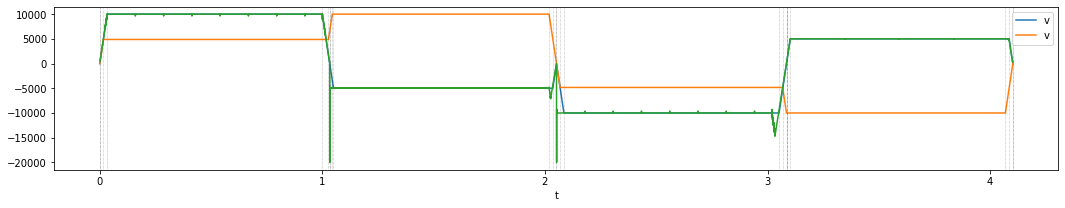

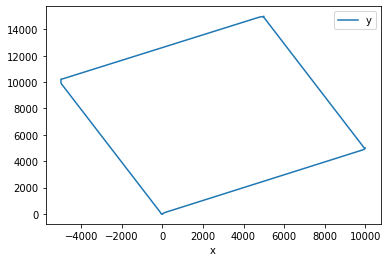

In [3]:

    
    
j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  

x = 10000

sl.move([x,x/2])
sl.move([-x/2,x])
sl.move([-x,-x/2])
sl.move([x/2,-x])

df = seg_step(sl)

sl.time, df.t.max()
df.head()

df = seg_step(sl)
ax = sl.plot()
step_v_plot(sl, ax)


step_plot(sl) 
df.describe()

In [106]:
df.describe()

,t,x,y
count,1.033326e+06,1.033326e+06,1.033326e+06
mean,2.066644e+00,2.903730e-02,2.903246e-02
std,1.193178e+00,1.679112e-01,1.678976e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.033325e+00,0.000000e+00,0.000000e+00
50%,2.066646e+00,0.000000e+00,0.000000e+00
75%,3.099967e+00,0.000000e+00,0.000000e+00
max,4.133288e+00,1.000000e+00,1.000000e+00


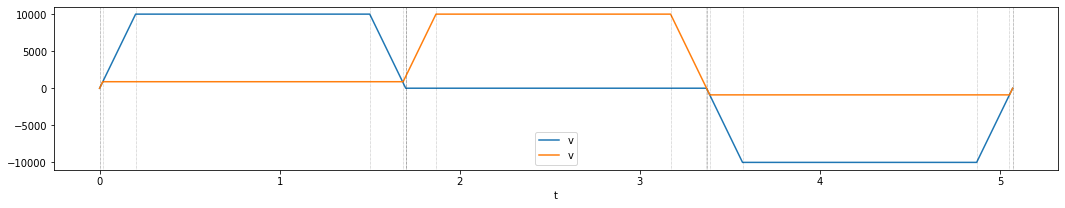

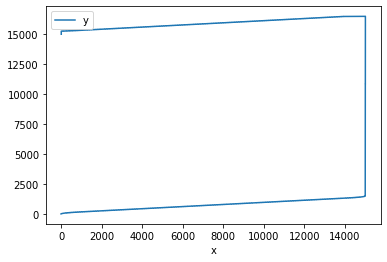

In [4]:
j = Joint(10_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 15000

sl.move([x,x/10])
sl.move([10,x])
sl.move([-x,-x/10])
sl.plot()
step_plot(sl) 


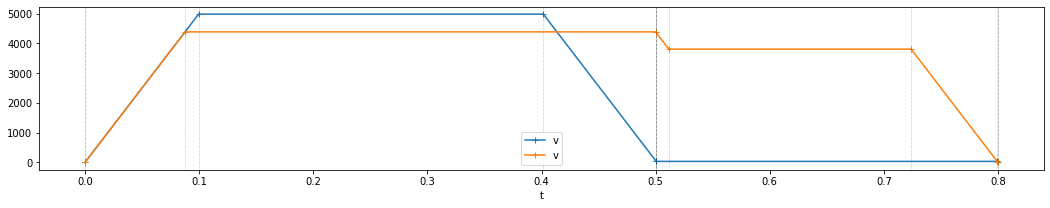

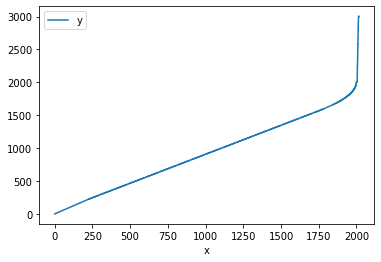

In [8]:


j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 2000
sl.move([x,x])
sl.move([10,1000])

sl.plot()
step_plot(sl)  

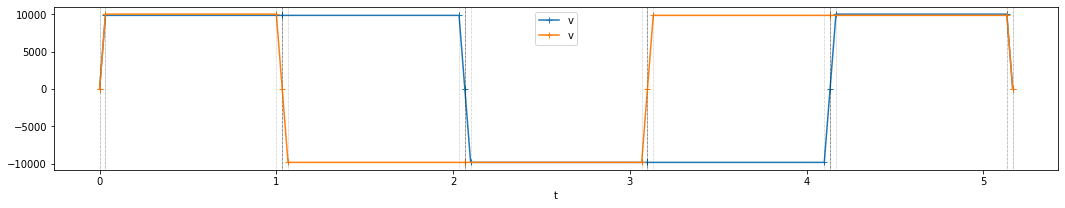

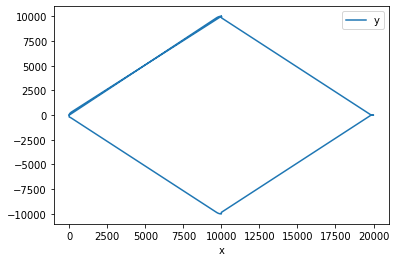

In [133]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 10000

sl.move([x,x])
sl.move([x,-x])
sl.move([-x,-x])
sl.move([-x,x])
sl.move([x,x])
 
sl.plot()
step_plot(sl) 

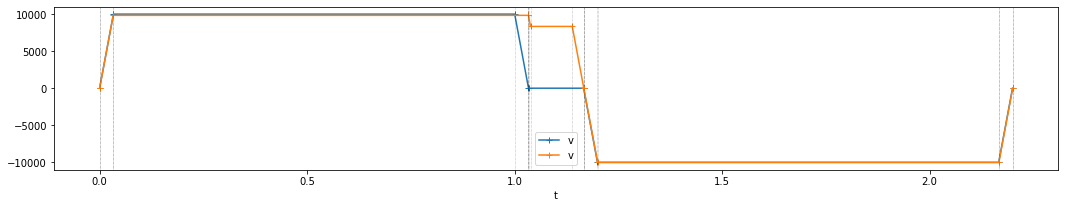

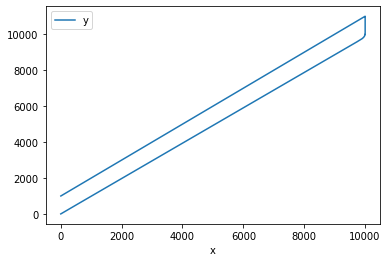

In [132]:
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 10000

sl.move([x,x])
sl.move([1,1000])
sl.move([-x,-x])
 
sl.plot()
step_plot(sl) 

In [36]:
j

Joint(v_max=10000, a_max=500000, small_x=100.0, max_discontinuity=50.0, max_at=0.02, n=0)

## R=10000 N=25 Tmean = 0.5143344038461538

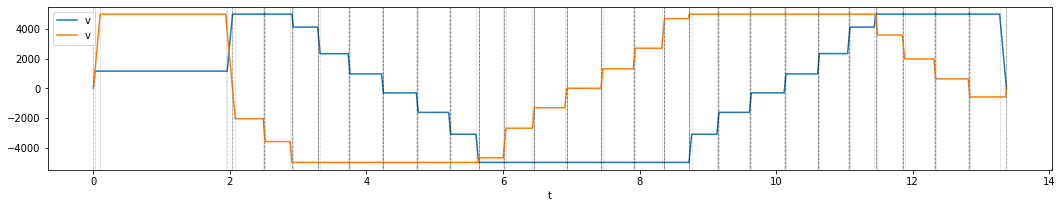

N Discont,0
Replans,"[(4, 17), (2, 8)]"
N Replans,646
Errors,[]
Reductions,[]


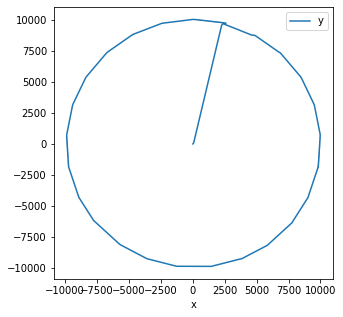

In [50]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from trajectory.plot import  * 
from math import sin, cos, sqrt
from trajectory.planner import Segment, SegmentList, Joint

from trajectory.plot import * 
j = Joint(10_000, 500_000)

def make_circle(r=5000, n=100):
    j = Joint(5_000, 50_000)
    joints = [j]*2

    sl = SegmentList(joints)   
    r = r
    n = n
    lx  = 0
    ly = 0
    for i in range(1,n+2):
        a = 2*np.pi*(i/n)
        x = sin(a)*r 
        y = cos(a)*r 
        if True or sqrt(x**2+y**2) > 100:
            sl.move((round(x-lx),round(y-ly)))
            lx = x
            ly = y
            
    t_m = np.mean(list(chain(*[s.times for s in sl])))
    display(Markdown(f"## R={r} N={n} Tmean = {t_m}"))     

    
    sl.plot();plt.show()
    fig, ax = plt.subplots(1,figsize=(5,5))
    step_plot(sl, ax=ax)
    report(sl)
    return sl
 
sl = make_circle(10_000, 25)

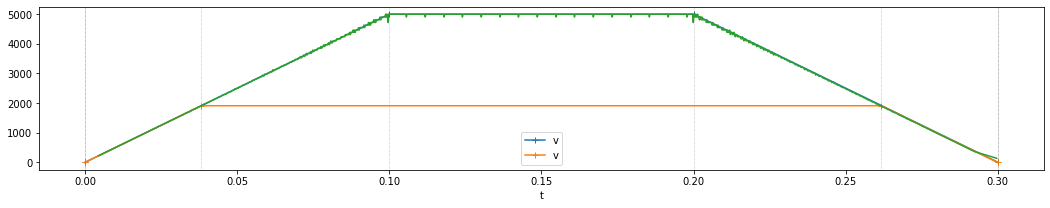

In [67]:
#
# Calculate velocity profile directly from steps
#
j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  

x = 1000

sl.move([x,x/2])
#sl.move([x/2,x])

ax = sl.plot()



step_v_plot(sl)

In [31]:
df.t.max(), sl.time

(1.131484, 0.300065)

In [99]:
np.log10(100_000)/np.log10(2)

16.609640474436812

In [131]:
from trajectory.stepper import Stepper

s = Stepper(-200, 1000,0, 4)
l  = [e for e in s]
pd.Series(l).describe()

HERE
HERE 2


count    41392.000000
mean        -0.004832
std          0.069344
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
dtype: float64